In [2]:
import datajoint as dj
from ibl_pipeline import reference, subject, action, acquisition, ephys, behavior

from ibl_pipeline.analyses import behavior as behavior_analyses

Connecting shan@datajoint.internationalbrainlab.org:3306
Connected to https://alyx.internationalbrainlab.org as vathes
Connected to https://alyx.internationalbrainlab.org as vathes


In [5]:
f = dj.Di(reference) - reference.BrainLocationAcronym - reference.Severity - reference.Atlas

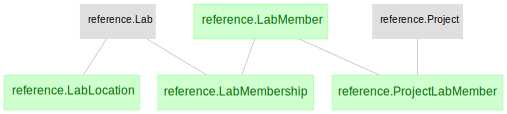

In [6]:
f

In [7]:
f.save('reference.svg')

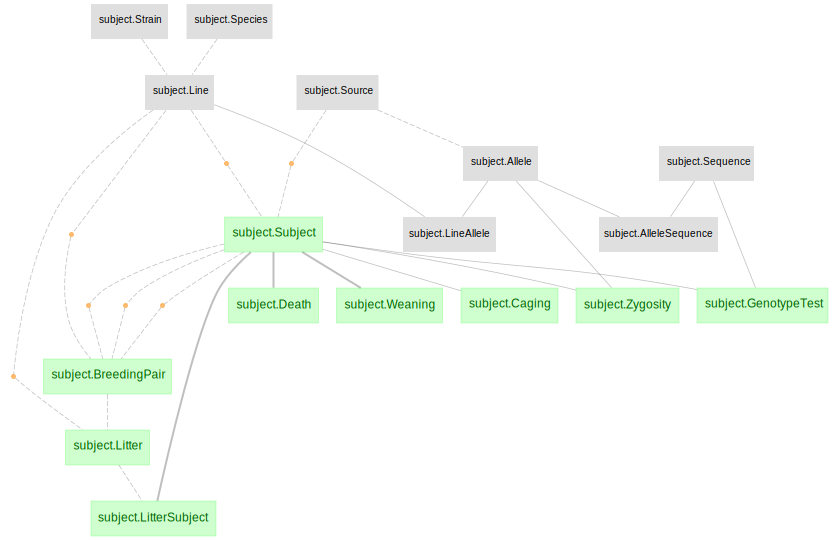

In [12]:
f = dj.Di(subject) - subject.SubjectProject - subject.SubjectUser - subject.SubjectCullMethod - subject.SubjectLab - \
    subject.UserHistory - subject.Implant
f

In [13]:
f.save('subject.svg')

In [17]:
action_virtual = dj.create_virtual_module('action_virtual', 'ibl_action')

/usr/local/lib/python3.6/dist-packages/datajoint/connection.py:212: UserWarning: MySQL server has gone away. Reconnecting to the server.
  warnings.warn("MySQL server has gone away. Reconnecting to the server.")


In [23]:
f = dj.Diagram(action) -dj.Diagram(action_virtual.WaterType) - dj.Di(action_virtual.SurgeryLabMember) + subject.Subject - \
action.VirusInjection - action.OtherAction - action.OtherActionUser - action.OtherActionProcedure

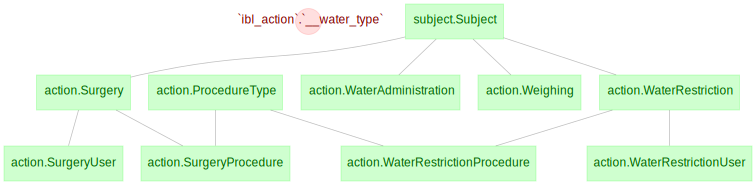

In [25]:
f

In [26]:
f.save('action.svg')

In [28]:
acq = dj.create_virtual_module('acq', 'ibl_acquisition')

In [31]:
f = dj.Di(acquisition) - acq.SessionProcedureType - acq.SessionLabMember

In [32]:
f.save('acquisition.svg')

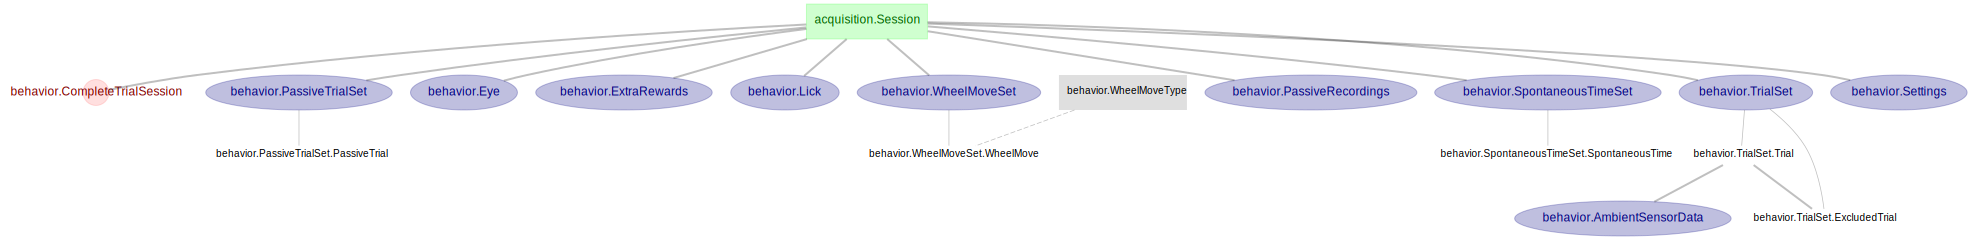

In [33]:
dj.Di(behavior) - 1 - dj.Di(behavior.CompleteWheelMoveSession) - dj.Di(behavior.CompleteWheelSession) - dj.Di(behavior.SparseNoise) - \
dj.Di(behavior.SpontaneousTimeSet) - dj.Di(behavior.PassiveTrialSet) - dj.Di(behavior.Wheel)

In [48]:
f = dj.Di(acquisition.Session) + (dj.Di(behavior.TrialSet) + behavior.TrialSet.Trial) + behavior.WheelMoveSet + behavior.WheelMoveSet.WheelMove +\
behavior.Eye + behavior.Lick

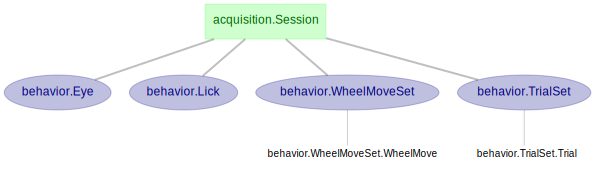

In [49]:
f

In [50]:
f.save('behavior_erd.svg')

In [56]:
f = dj.Di(behavior.TrialSet)+dj.Di(behavior_analyses.SessionTrainingStatus) + behavior_analyses.ReactionTime + \
behavior_analyses.TrainingStatus + dj.Di(behavior_analyses.PsychResults) + behavior_analyses.BehavioralSummaryByDate + \
behavior_analyses.BehavioralSummaryByDate.PsychResults + behavior_analyses.BehavioralSummaryByDate.ReactionTimeByDate + subject.Subject

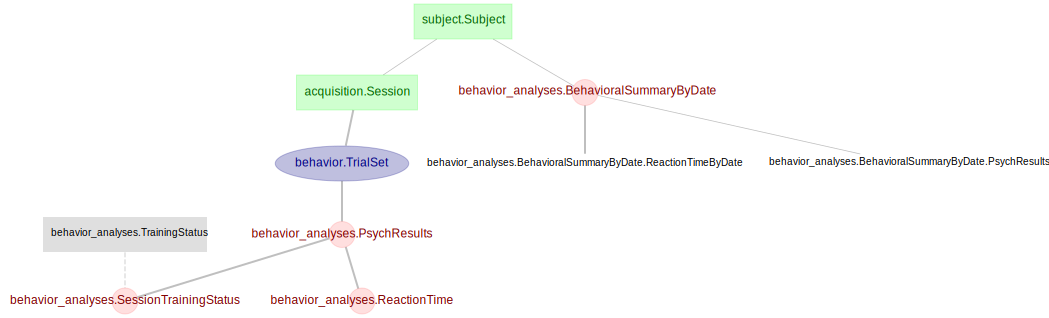

In [57]:
f

In [58]:
f.save('behavior_analyses_erd.svg')

In [54]:
ephys_di = dj.Di(ephys.Ephys) + ephys.Probe + ephys.ProbeInsertion + ephys.LFP + ephys.ProbeInsertionLocation + \
           (dj.Di(ephys.ChannelGroup) + 1) + ephys.ProbeInsertionLocation + ephys.ChannelBrainLocation + ephys.Ephys + \
           ephys.Cluster + ephys.TrialSpikes

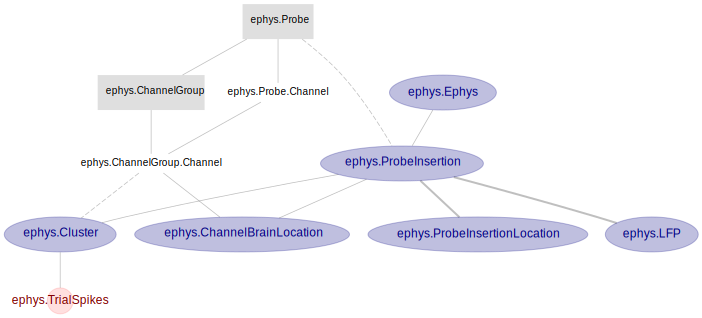

In [56]:
ephys_di

In [63]:
ephys_di.save('ephys_erd.svg')

In [61]:
ephys_behav = dj.Di(behavior.TrialSet) + acquisition.Session + ephys_di

In [64]:
ephys_behav.save('ephys_behavior_erd.svg')